<a href="https://colab.research.google.com/github/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/blob/main/Rosana_Trevisan_Projeto_M%C3%B3dulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO MÓDULO 2 - BOOTCAMP DATA SCIENCE APLICADA ALURA**

Autora: Rosana Trevisan Roque

# ***OBJETIVO***

Analisar bases de dados do programa de imunização nacional do [DATASUS](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) para verificar:
- Evolução da cobertura de todas as vacinas no Brasil ao longo dos anos (2000 a 2019).
- Cobertura vacinal total Brasil e por estado com foco no ano de 2019 (ano completo mais recente).
- Vacinas específicas:
    - Febre amarela: cobertura vacinal por região / estado ao longo dos anos.
    - Poliomielite: cobertura vacinal por estado e número de casos de Polio no ano de 2019 .
    - Tríplice / Tetra Viral: cobertura vacinal por estado e número de casos de Sarampo no ano de 2019.

# ***RESUMO***

- Analisando a evolução da cobertura de todas as vacinas (total Brasil) no período 2000 a 2019, observa-se que algumas foram implementadas nos últimos anos.
- Apesar do aumento da oferta de diferentes tipos de vacinas, nos últimos anos algumas vacinas apresentaram queda na cobertura, destacando-se, por exemplo: DTP REF, Tetra Viral, Penta, Hepatite B, entre outras.
- Vacinas DTP e Tríplice Bacteriana (para difteria, tétano e coqueluche) apresentaram grande queda na cobertura no ano de 2019.
- A vacina de maior e mais constante cobertura ao longo de todos os anos foi a BCG.
- Após o surto de 2016, a vacina de febre amarela foi implantada em toda a região Sul, estados do Espírito Santo, Rio de Janeiro, Bahia e São Paulo, atingindo 80% dos municípios brasileiros. Com isso, a taxa de cobertura da vacina foi elevado para acima de 60% após 2018. Infelizmente não há dados disponíveis sobre número de casos de Febre Amarela após 2017 no Datasus (Tabnet).
- Queda na cobertura da vacina para Poliomielite: historicamente uma das maiores coberturas vacinais, infelizmente está diminuindo nos últimos anos, atingindo 84% em 2019 no total Brasil.
- A vacina "Poliomielite 4 anos" tem menor cobertura do que a vacina "Poliomielite" aplicada em bebês de até 1 ano de idade, indicando que os pais estão deixando de levar os filhos para vacinação ao longo dos anos, provavelmente considerando que as doses de reforço não são necessárias. 
- Dos 10 estados com maior número de casos de Polio a cada 100 mil habitantes, 8 estão nas regiões Norte e Nordeste. Os 2 estados com maior número de casos são Amazonas e Pernambuco, provavelmente pela dificuldade de acesso às vacinas pela população que vive em zonas rurais e ribeirinhas.
- Vacinas Tríplice e Tetra Viral apresentaram queda na cobertura, com consequente aumento do número de casos de sarampo e caxumba. Surto de sarampo principalmente no estado de São Paulo em 2019, provavelmente relacionado à baixa cobertura das vacinas (especialmente Tetra Viral).

# ***CONCLUSÕES***

A queda na cobertura das vacinas em geral pode ser explicada pelo  fato de algumas doenças serem consideradas "erradicadas", o que causou uma falsa sensação de que não há mais necessidade de vacinar e/ou aplicar doses de reforço. Além disso, a circulação de noticias falsas na internet e grupos de WhatsApp causou dúvidas na
população sobre a segurança e eficácia das vacinas (movimento anti-vacina).

# ***ANÁLISE DOS DADOS***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import date
import numpy as np

# 1) Cobertura vacinal - todas as vacinas - total Brasil - evolução ao longo dos anos



In [ ]:
vacinas_anos = pd.read_csv('https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Todas_vacinas_total%20Brasil_1994%20a%202019.csv', 
                           encoding="ISO-8859-1", sep=";", decimal=",")
vacinas_anos.head()

,Imuno,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,BCG,88.31,103.63,104.21,117.12,111.61,117.28,111.74,112.60,110.28,108.47,113.36,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.98,99.72,86.67,64.71,105.78
1,Hepatite B em crianças até 30 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.54,90.93,81.75,85.88,88.40,78.57,55.89,71.41
2,Rotavírus Humano,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46.52,79.79,81.18,85.99,83.04,87.06,86.37,93.52,93.44,95.35,88.98,85.12,91.33,85.40,67.59,60.69
3,Meningococo C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.88,105.66,96.18,99.70,96.36,98.19,91.68,87.44,88.49,87.41,68.17,64.09
4,Hepatite B,8.85,10.50,16.50,5.79,12.63,83.50,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,84.40,88.53,70.77,66.20,78.36


In [ ]:
#trabalhando somente com informações de 2000 a 2019
colunas = ['Imuno','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
vacinas_2000 = pd.read_csv('https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Todas_vacinas_total%20Brasil_1994%20a%202019.csv', 
                           encoding="ISO-8859-1", sep=";", decimal=",", usecols=colunas)
vacinas_2000.head()

,Imuno,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,BCG,111.74,112.60,110.28,108.47,113.36,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.98,99.72,86.67
1,Hepatite B em crianças até 30 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.54,90.93,81.75,85.88,88.40,78.57
2,Rotavírus Humano,0.00,0.00,0.00,0.00,0.00,0.00,46.52,79.79,81.18,85.99,83.04,87.06,86.37,93.52,93.44,95.35,88.98,85.12,91.33,85.40
3,Meningococo C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.88,105.66,96.18,99.70,96.36,98.19,91.68,87.44,88.49,87.41
4,Hepatite B,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,84.40,88.53,70.77


In [ ]:
#Colocando a coluna Imuno como Index
vacinas_2000 = vacinas_2000.set_index('Imuno')
vacinas_2000.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
BCG,111.74,112.60,110.28,108.47,113.36,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.98,99.72,86.67
Hepatite B em crianças até 30 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.54,90.93,81.75,85.88,88.40,78.57
Rotavírus Humano,0.00,0.00,0.00,0.00,0.00,0.00,46.52,79.79,81.18,85.99,83.04,87.06,86.37,93.52,93.44,95.35,88.98,85.12,91.33,85.40
Meningococo C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.88,105.66,96.18,99.70,96.36,98.19,91.68,87.44,88.49,87.41
Hepatite B,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,84.40,88.53,70.77


In [ ]:
# Organizando o dataframe com melt para ficar mais fácil de fazer os gráficos. 
vacinas_2000_melt = vacinas_2000.reset_index().melt(id_vars='Imuno', value_vars=vacinas_2000,
                                                         var_name='anos', value_name='cobertura')

vacinas_2000_melt

,Imuno,anos,cobertura
0,BCG,2000,111.74
1,Hepatite B em crianças até 30 dias,2000,0.00
2,Rotavírus Humano,2000,0.00
3,Meningococo C,2000,0.00
4,Hepatite B,2000,91.08
...,...,...,...
535,Dupla adulto e tríplice acelular gestante,2019,45.02
536,dTpa gestante,2019,63.23
537,Tetravalente (DTP/Hib) (TETRA),2019,0.00
538,Ignorado,2019,0.00


## Gráfico: evolução da cobertura vacinal no Brasil - 2000 a 2019 (versão 1)

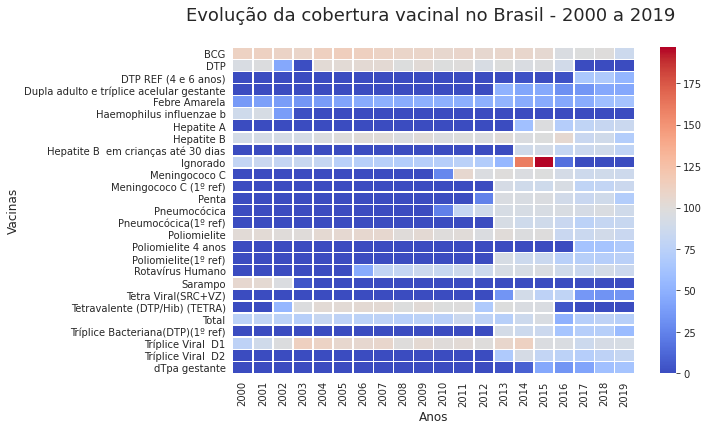

In [ ]:
gr_vacinas_anos = vacinas_2000_melt.pivot("Imuno", "anos", "cobertura")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(gr_vacinas_anos, linewidths=.5, ax=ax, cmap='coolwarm')
ax.set_xlabel('Anos', fontsize=12)
ax.set_ylabel('Vacinas', fontsize=12)
plt.title('Evolução da cobertura vacinal no Brasil - 2000 a 2019 \n', fontsize=18)
plt.show()

A linha da vacina "Ignorado" causou a "explosão" da faixa acima de 175% de cobertura e está dificultando a análise das demais vacinas. Vou retirar esta linha da base de dados.

In [ ]:
#criando outro dataframe para tirar a linha "Ignorado"
vacinas_2000_limpa_melt = vacinas_2000_melt.set_index('Imuno')
vacinas_2000_limpa_melt

,anos,cobertura
Imuno,,
BCG,2000,111.74
Hepatite B em crianças até 30 dias,2000,0.00
Rotavírus Humano,2000,0.00
Meningococo C,2000,0.00
Hepatite B,2000,91.08
...,...,...
Dupla adulto e tríplice acelular gestante,2019,45.02
dTpa gestante,2019,63.23
Tetravalente (DTP/Hib) (TETRA),2019,0.00


In [ ]:
#tirando as linhas Ignorado e Total
vacinas_2000_limpa_melt = vacinas_2000_limpa_melt.drop(index='Ignorado')
vacinas_2000_limpa_melt = vacinas_2000_limpa_melt.drop(index='Total')
vacinas_2000_limpa_melt = vacinas_2000_limpa_melt.reset_index()
vacinas_2000_limpa_melt

,Imuno,anos,cobertura
0,BCG,2000,111.74
1,Hepatite B em crianças até 30 dias,2000,0.00
2,Rotavírus Humano,2000,0.00
3,Meningococo C,2000,0.00
4,Hepatite B,2000,91.08
...,...,...,...
495,Sarampo,2019,0.00
496,Haemophilus influenzae b,2019,0.00
497,Dupla adulto e tríplice acelular gestante,2019,45.02
498,dTpa gestante,2019,63.23


## Gráfico: evolução da cobertura vacinal no Brasil - 2000 a 2019 (versão 2)

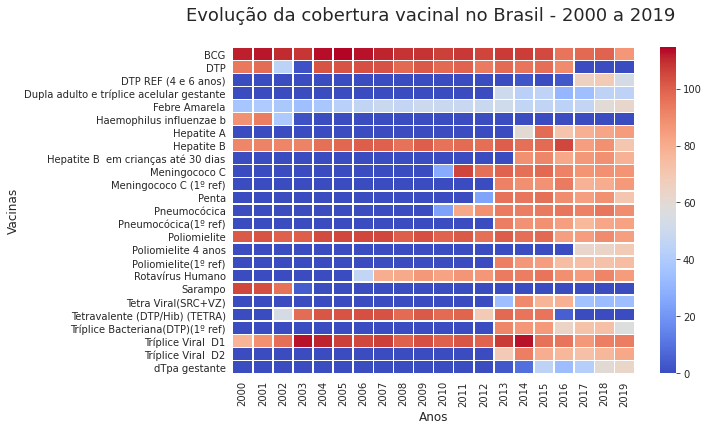

In [ ]:
gr_vacinas_2000_limpa = vacinas_2000_limpa_melt.pivot("Imuno", "anos", "cobertura")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(gr_vacinas_2000_limpa, linewidths=.5, ax=ax, cmap='coolwarm')
ax.set_xlabel('Anos', fontsize=12)
ax.set_ylabel('Vacinas', fontsize=12)
plt.title('Evolução da cobertura vacinal no Brasil - 2000 a 2019 \n', fontsize=18)
plt.show()

Após a retirada da linha de vacina 'Ignorado', ficou muito mais fácil visualizar os contrastes de cores no gráfico.

Aumento do número de vacinas ao longo dos anos: as vacinas de cores azul escuro no início dos anos 2000 não existiam até o ano em que foram implementadas, sinalizado pela mudança de cor no gráfico para azul claro ou vermelho.

A vacina de maior cobertura ao longo de todos os anos foi a BCG.

Vacina de febre amarela com cobertura praticamente constante entre 2006 a 2017, aumentou a cobertura para acima de 60% após 2018. 

Apesar da tendência de aumento da cobertura vacinal em geral ao longo dos anos, algumas vacinas apresentaram queda na cobertura nos últimos anos, destacando-se por exemplo: DTP REF, Tríplice Bacteriana, Tetra Viral, Penta, Hepatite B. 

Atenção também para a queda na cobertura das vacinas relacionadas à Poliomielite: historicamente uma das maiores coberturas vacinais, infelizmente está diminuindo nos últimos anos, atingindo 84% em 2019.

Vacinas que protegem contra sarampo, caxumba e rubéola:
- Tríplice Viral D1: para bebês até 1 ano de idade, apresenta cobertura constante acima de 90%.
- Tríplice Viral D2: para bebês com mais de 1 ano de idade, apresenta cobertura menor do que a D1.
- Vacina Tetra Viral (SRC+VZ): protege também contra varicela, indicada para crianças de 15 meses a 2 anos. Apresentou grande queda na cobertura a partir do ano de 2017.

Vacinas para difteria, tétano e coqueluche:
- DTP: tinha bom nivel de cobertura (acima de 90%) caiu a 0 em 2017 pois foi substituída pela DTP REF neste ano.
- DTP REF e Tríplice Bacteriana: grande queda na cobertura no ano de 2019.

#2) Cobertura vacinal - todas as vacinas - total Brasil - ano 2019

In [ ]:
vacinas_Brasil_2019 = pd.read_csv("https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Vacinas_total%20Brasil_2019.csv",
                    encoding="ISO-8859-1", sep=";", decimal=",")
vacinas_Brasil_2019

,Imuno,2019,Total
0,BCG,86.67,86.67
1,Hepatite B em crianças até 30 dias,78.57,78.57
2,Rotavírus Humano,85.40,85.40
3,Meningococo C,87.41,87.41
4,Hepatite B,70.77,70.77
5,Penta,70.76,70.76
6,Pneumocócica,89.07,89.07
7,Poliomielite,84.19,84.19
8,Poliomielite 4 anos,68.45,68.45
9,Febre Amarela,62.41,62.41


In [ ]:
vacinas_Brasil_2019 = vacinas_Brasil_2019.sort_values(by=['2019'], ascending=False)
vacinas_Brasil_2019

,Imuno,2019,Total
14,Tríplice Viral D1,93.12,93.12
6,Pneumocócica,89.07,89.07
3,Meningococo C,87.41,87.41
0,BCG,86.67,86.67
12,Meningococo C (1º ref),85.78,85.78
2,Rotavírus Humano,85.40,85.40
10,Hepatite A,85.02,85.02
7,Poliomielite,84.19,84.19
11,Pneumocócica(1º ref),83.47,83.47
15,Tríplice Viral D2,81.55,81.55


## Gráfico: Cobertura vacinal - todas as vacinas - total Brasil - 2019

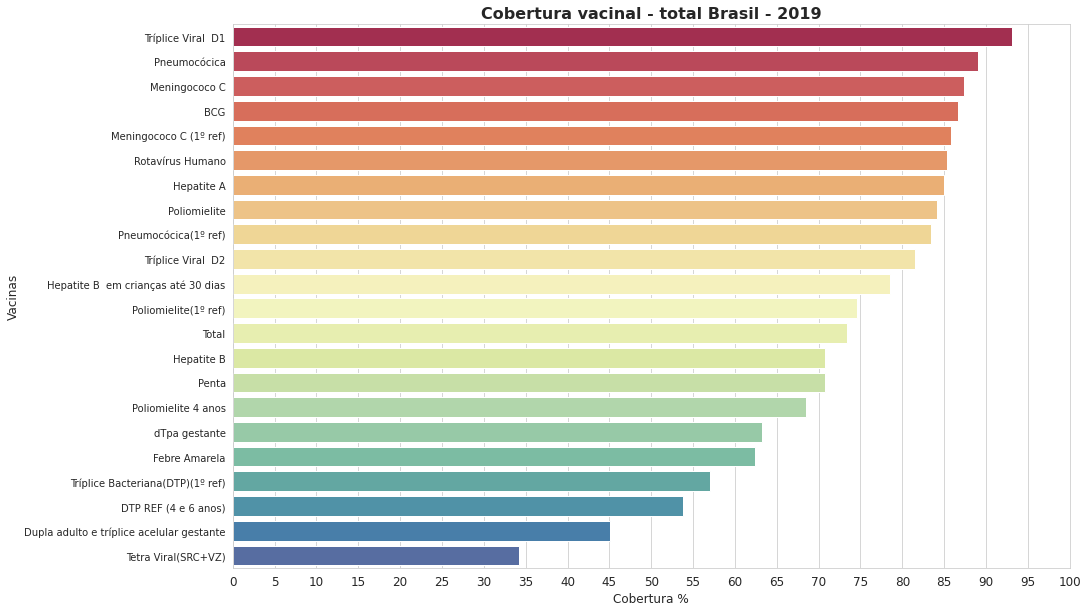

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(data=vacinas_Brasil_2019, x='2019', y='Imuno', palette='Spectral')
plt.xticks(np.arange(0,105,5), fontsize=12) 
plt.title('Cobertura vacinal - total Brasil - 2019', fontsize=16, fontweight="bold")
plt.xlabel('Cobertura %', fontsize=12)
plt.ylabel('Vacinas', fontsize=12)
plt.show()

Considerando o total Brasil, nenhuma das vacinas atingiu a meta de cobertura vacinal de 95%. 12 vacinas tiveram cobertura inferior a 80%.

Na sequência farei a análise por estado no ano de 2019.

# 3) Cobertura vacinal - todas as vacinas - por estado no ano de 2019

In [ ]:
#carregando a base de dados
vacinas_2019 = pd.read_csv("https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Todas_vacinas_por%20estado_2019.csv",
                    encoding="ISO-8859-1", sep=";", decimal=",")
vacinas_2019.head()

,Unidade da Federação,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Total
0,11 Rondônia,88.11,86.75,88.92,92.63,89.66,89.66,102.44,98.26,63.78,81.42,85.01,97.68,89.81,75.47,106.42,82.25,70.74,49.83,55.01,53.32,75.54,82.12
1,12 Acre,93.86,91.26,84.50,89.67,76.42,76.42,91.53,81.73,50.98,68.69,80.62,78.82,85.96,70.66,87.39,78.65,75.68,44.19,51.30,49.19,64.51,74.83
2,13 Amazonas,93.27,89.62,82.55,89.23,78.58,78.58,92.51,83.29,75.83,74.10,85.32,86.41,90.88,77.02,92.12,82.29,72.71,64.28,65.04,53.39,69.61,79.80
3,14 Roraima,115.88,115.53,78.95,83.54,64.39,64.39,90.26,79.76,67.68,69.77,81.05,72.63,77.20,69.29,81.21,86.72,74.53,67.49,68.09,42.43,70.99,77.48
4,15 Pará,83.06,75.47,76.03,77.41,62.38,62.38,82.14,72.72,39.49,62.60,72.67,73.55,74.55,60.00,82.81,71.34,59.90,35.44,44.11,46.78,59.87,65.14


In [ ]:
#colocando os estados como índice
vacinas_2019 = vacinas_2019.set_index('Unidade da Federação')
vacinas_2019.head()

,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,88.11,86.75,88.92,92.63,89.66,89.66,102.44,98.26,63.78,81.42,85.01,97.68,89.81,75.47,106.42,82.25,70.74,49.83,55.01,53.32,75.54,82.12
12 Acre,93.86,91.26,84.50,89.67,76.42,76.42,91.53,81.73,50.98,68.69,80.62,78.82,85.96,70.66,87.39,78.65,75.68,44.19,51.30,49.19,64.51,74.83
13 Amazonas,93.27,89.62,82.55,89.23,78.58,78.58,92.51,83.29,75.83,74.10,85.32,86.41,90.88,77.02,92.12,82.29,72.71,64.28,65.04,53.39,69.61,79.80
14 Roraima,115.88,115.53,78.95,83.54,64.39,64.39,90.26,79.76,67.68,69.77,81.05,72.63,77.20,69.29,81.21,86.72,74.53,67.49,68.09,42.43,70.99,77.48
15 Pará,83.06,75.47,76.03,77.41,62.38,62.38,82.14,72.72,39.49,62.60,72.67,73.55,74.55,60.00,82.81,71.34,59.90,35.44,44.11,46.78,59.87,65.14


In [ ]:
#tirando os 3 primeiros caracteres (números) para ficar somente os nomes dos estados
vacinas_2019.index = vacinas_2019.index.str[3:]
vacinas_2019.head()

,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
Rondônia,88.11,86.75,88.92,92.63,89.66,89.66,102.44,98.26,63.78,81.42,85.01,97.68,89.81,75.47,106.42,82.25,70.74,49.83,55.01,53.32,75.54,82.12
Acre,93.86,91.26,84.50,89.67,76.42,76.42,91.53,81.73,50.98,68.69,80.62,78.82,85.96,70.66,87.39,78.65,75.68,44.19,51.30,49.19,64.51,74.83
Amazonas,93.27,89.62,82.55,89.23,78.58,78.58,92.51,83.29,75.83,74.10,85.32,86.41,90.88,77.02,92.12,82.29,72.71,64.28,65.04,53.39,69.61,79.80
Roraima,115.88,115.53,78.95,83.54,64.39,64.39,90.26,79.76,67.68,69.77,81.05,72.63,77.20,69.29,81.21,86.72,74.53,67.49,68.09,42.43,70.99,77.48
Pará,83.06,75.47,76.03,77.41,62.38,62.38,82.14,72.72,39.49,62.60,72.67,73.55,74.55,60.00,82.81,71.34,59.90,35.44,44.11,46.78,59.87,65.14


In [ ]:
# Organizando o dataframe com melt para ficar mais fácil de fazer os gráficos. 
vacinas_2019_melt = vacinas_2019.iloc[:-1,:].reset_index().melt(id_vars='Unidade da Federação', value_vars=vacinas_2019.columns[:-1],
                                                         var_name='vacina', value_name='cobertura')
vacinas_2019_melt

,Unidade da Federação,vacina,cobertura
0,Rondônia,BCG,88.11
1,Acre,BCG,93.86
2,Amazonas,BCG,93.27
3,Roraima,BCG,115.88
4,Pará,BCG,83.06
...,...,...,...
562,Rio Grande do Sul,dTpa gestante,68.08
563,Mato Grosso do Sul,dTpa gestante,79.42
564,Mato Grosso,dTpa gestante,67.12
565,Goiás,dTpa gestante,64.04


In [ ]:
vacinas_2019_melt.rename(columns={'Unidade da Federação': 'uf', 'vacina': 'vacina', 'cobertura':'cobertura'}, inplace=True)
vacinas_2019_melt.head()

,uf,vacina,cobertura
0,Rondônia,BCG,88.11
1,Acre,BCG,93.86
2,Amazonas,BCG,93.27
3,Roraima,BCG,115.88
4,Pará,BCG,83.06


## Gráfico: Cobertura Vacinal por estado no ano de 2019

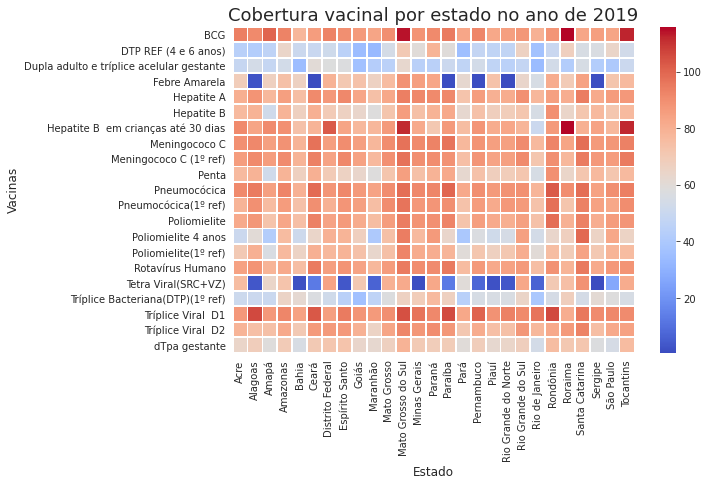

In [ ]:
gr_vacinas_2019 = vacinas_2019_melt.pivot("vacina", "uf", "cobertura")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(gr_vacinas_2019, linewidths=.8, ax=ax, cmap='coolwarm')
ax.set_xlabel('Estado', fontsize=12)
ax.set_ylabel('Vacinas', fontsize=12)
plt.title('Cobertura vacinal por estado no ano de 2019', fontsize=18)
plt.show()

O gráfico tipo Heatmap ajudou a termos uma rápida visualização da cobertura vacional por estado no ano de 2019. 

Destaque negativo para a vacina Tetra Viral (SRC+VZ) que ficou abaixo de 20% de cobertura em 13 estados. Esta vacina proteje contra sarampo, caxumba, rubéola e varicela e está recomendada para crianças e adolescentes com menos de 12 anos em substituição às vacinas tríplice viral (SCR) e varicela. 

Vacinas com cobertura abaixo de 50% na maioria dos estados: DTP REF e Dupla Adulto Tríplice celular gestante. 

A vacina da Febre Amarela teve cobertura abaixo de 20% em 6 estados, todos localizados nas regiões Norte e Nordeste. A seguir farei uma análise mais aprofundada sobre a vacina de Febre Amarela.

# 4) Febre Amarela

Em 2016, o vírus da febre amarela emergiu no extremo leste brasileiro,
causando o maior surto de febre amarela silvestre observado nas últimas décadas, envolvendo principalmente os estados de Minas Gerais, Espírito Santo, São Paulo, Rio de Janeiro e Bahia.
Diante desse cenário epidemiológico, observou-se a expansão da área de
circulação do vírus amarílico para Municípios das regiões Sudeste e Sul do Brasil, que não eram áreas de risco para a doença. Dessa forma, dos 3.529 municípios que eram área com recomendação de vacinação (ACRV) até 2017, ampliou-se para mais 940 municípios, totalizando 4.469 municípios classificados como ACRV.
A partir da expansão das áreas de risco, e após anúncio do Ministério da Saúde referente a ampliação da vacina febre amarela para todo o País, houve a implantação desta vacina em toda a região Sul, estados do Espírito Santo, Rio de Janeiro, Bahia e São Paulo; um município de Sergipe e um município de Alagoas, totalizando 80% dos Municípios brasileiros com a referida vacina implantada.
As áreas sem recomendação de vacinação (ASRV) incluem os estados do
Ceará, Rio Grande do Norte, Paraíba, Pernambuco, parte do estado do Piauí, Alagoas (exceto município de Delmiro Gouveia) e Sergipe (exceto município de Canindé de São
Francisco). 

Fonte: https://sbim.org.br/images/files/ms-sei-implantacao-da-vfa-dose-de-reforco.pdf

In [ ]:
#carregando a base de dados
febre = pd.read_csv("https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Febre%20amarela_por%20estado_1994%20a%202019.csv",
                    encoding="ISO-8859-1", sep=";", decimal=",")
febre.head()

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,11 Rondônia,8.29,49.44,66.06,97.43,115.31,103.35,113.63,114.25,100.23,93.86,75.87,105.13,119.70,114.96,104.43,102.31,97.74,103.51,103.02,103.68,103.17,106.06,114.05,107.67,89.69,81.42,64.92,92.12
1,12 Acre,0.00,63.59,30.00,85.83,73.51,99.23,90.06,102.46,101.18,95.36,69.08,79.37,83.81,97.63,86.29,97.22,91.17,96.38,94.45,84.12,58.78,66.67,64.33,62.66,66.74,68.69,42.38,76.57
2,13 Amazonas,7.55,16.68,69.11,74.31,108.21,93.87,100.65,98.87,89.94,84.35,73.50,89.07,92.13,97.76,87.54,94.48,88.78,89.88,93.64,91.35,92.46,92.52,75.83,70.32,69.88,74.10,53.94,80.33
3,14 Roraima,3.70,33.29,46.30,53.11,112.89,98.09,141.29,92.32,103.89,96.17,71.01,95.09,90.78,95.97,91.82,100.57,90.75,93.11,83.87,80.36,86.89,93.64,87.95,96.83,72.72,69.77,42.15,83.59
4,15 Pará,5.36,12.84,17.94,29.26,80.62,92.57,85.95,100.19,95.47,99.85,92.78,103.10,98.62,107.84,100.04,107.97,100.80,95.98,95.00,90.07,70.42,57.71,59.57,59.14,63.11,62.60,42.26,74.90


In [ ]:
#Colocando os estados como índice do dataframe
febre = febre.set_index('Unidade da Federação')
febre.index = febre.index.rename('Estados')
febre.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Estados,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,8.29,49.44,66.06,97.43,115.31,103.35,113.63,114.25,100.23,93.86,75.87,105.13,119.70,114.96,104.43,102.31,97.74,103.51,103.02,103.68,103.17,106.06,114.05,107.67,89.69,81.42,64.92,92.12
12 Acre,0.00,63.59,30.00,85.83,73.51,99.23,90.06,102.46,101.18,95.36,69.08,79.37,83.81,97.63,86.29,97.22,91.17,96.38,94.45,84.12,58.78,66.67,64.33,62.66,66.74,68.69,42.38,76.57
13 Amazonas,7.55,16.68,69.11,74.31,108.21,93.87,100.65,98.87,89.94,84.35,73.50,89.07,92.13,97.76,87.54,94.48,88.78,89.88,93.64,91.35,92.46,92.52,75.83,70.32,69.88,74.10,53.94,80.33
14 Roraima,3.70,33.29,46.30,53.11,112.89,98.09,141.29,92.32,103.89,96.17,71.01,95.09,90.78,95.97,91.82,100.57,90.75,93.11,83.87,80.36,86.89,93.64,87.95,96.83,72.72,69.77,42.15,83.59
15 Pará,5.36,12.84,17.94,29.26,80.62,92.57,85.95,100.19,95.47,99.85,92.78,103.10,98.62,107.84,100.04,107.97,100.80,95.98,95.00,90.07,70.42,57.71,59.57,59.14,63.11,62.60,42.26,74.90


In [ ]:
#convertendo os anos para números inteiros e selecionando apenas os anos 2000 a 2019
febre = febre.loc[:,'2000':'2019'] 
febre.columns = febre.columns.astype('int')
febre

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Estados,,,,,,,,,,,,,,,,,,,,
11 Rondônia,113.63,114.25,100.23,93.86,75.87,105.13,119.70,114.96,104.43,102.31,97.74,103.51,103.02,103.68,103.17,106.06,114.05,107.67,89.69,81.42
12 Acre,90.06,102.46,101.18,95.36,69.08,79.37,83.81,97.63,86.29,97.22,91.17,96.38,94.45,84.12,58.78,66.67,64.33,62.66,66.74,68.69
13 Amazonas,100.65,98.87,89.94,84.35,73.50,89.07,92.13,97.76,87.54,94.48,88.78,89.88,93.64,91.35,92.46,92.52,75.83,70.32,69.88,74.10
14 Roraima,141.29,92.32,103.89,96.17,71.01,95.09,90.78,95.97,91.82,100.57,90.75,93.11,83.87,80.36,86.89,93.64,87.95,96.83,72.72,69.77
15 Pará,85.95,100.19,95.47,99.85,92.78,103.10,98.62,107.84,100.04,107.97,100.80,95.98,95.00,90.07,70.42,57.71,59.57,59.14,63.11,62.60
16 Amapá,92.80,178.09,98.99,97.89,74.56,90.31,85.89,87.97,85.69,88.54,82.38,80.74,84.54,82.57,71.06,76.80,91.49,61.48,65.56,66.99
17 Tocantins,100.65,106.25,108.59,101.33,85.29,99.84,100.70,102.65,93.89,100.37,93.10,93.40,93.88,93.22,86.67,83.28,77.26,73.28,81.08,76.47
21 Maranhão,99.63,93.76,98.70,97.72,91.87,102.16,106.79,114.12,100.20,102.89,104.64,101.53,100.62,99.37,88.49,87.32,68.62,65.86,72.36,66.75
22 Piauí,68.88,61.18,81.73,85.48,93.78,94.41,99.73,103.72,98.40,99.89,93.99,92.71,97.29,90.34,76.49,74.20,71.72,69.85,76.92,73.40


In [ ]:
# Organizando o dataframe com melt para ficar mais fácil de fazer os gráficos. 
febre_melt = febre.reset_index().melt(id_vars='Estados', value_vars=febre.columns,
                                                         var_name='anos', value_name='cobertura')
febre_melt

,Estados,anos,cobertura
0,11 Rondônia,2000,113.63
1,12 Acre,2000,90.06
2,13 Amazonas,2000,100.65
3,14 Roraima,2000,141.29
4,15 Pará,2000,85.95
...,...,...,...
555,50 Mato Grosso do Sul,2019,88.88
556,51 Mato Grosso,2019,75.92
557,52 Goiás,2019,73.43
558,53 Distrito Federal,2019,79.19


In [ ]:
#criando um dicionário de regiões
regiao_dic = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste',
               '4': 'Sul', '5': 'Centro-Oeste'}

In [ ]:
#inserindo a coluna região no dataframe
febre_melt['Regiao'] = febre_melt['Estados'].str[0].map(regiao_dic)
febre_melt.head()

,Estados,anos,cobertura,Regiao
0,11 Rondônia,2000,113.63,Norte
1,12 Acre,2000,90.06,Norte
2,13 Amazonas,2000,100.65,Norte
3,14 Roraima,2000,141.29,Norte
4,15 Pará,2000,85.95,Norte


## Gráficos da evolução da cobertura da vacina de febre amarela por região / estado

### Região Norte

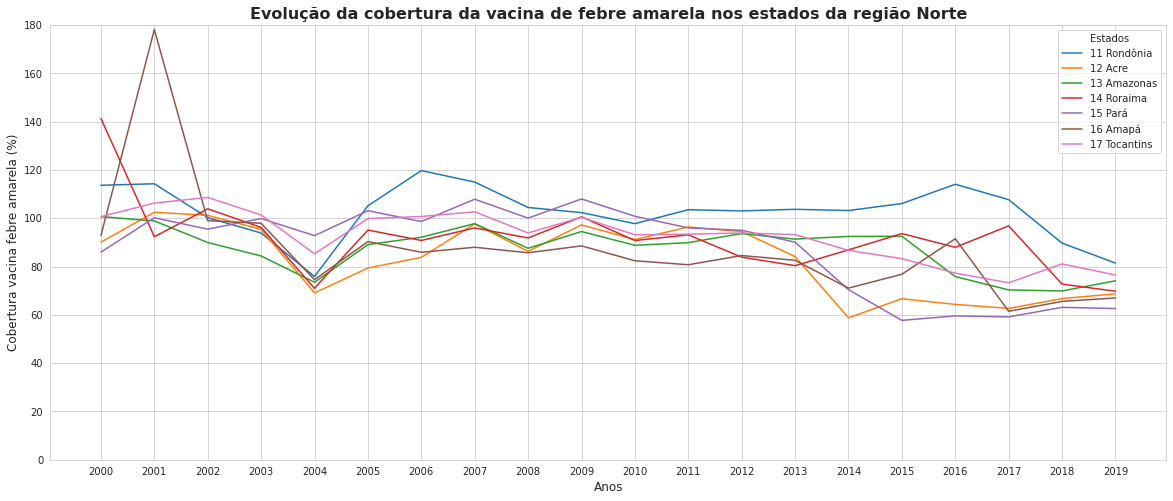

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=febre_melt.query('Regiao=="Norte"'), x='anos', y='cobertura', hue='Estados', palette='tab10')
plt.xticks(np.arange(2000,2020,1)) 
plt.title('Evolução da cobertura da vacina de febre amarela nos estados da região Norte', fontsize=16, fontweight="bold")
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Cobertura vacina febre amarela (%)', fontsize=12)
plt.ylim(0,180)
plt.grid(True)
plt.show()

Tendência de queda na cobertura vacinal de febre amarela nos últimos anos para todos os estados da região Norte.

### Região Nordeste

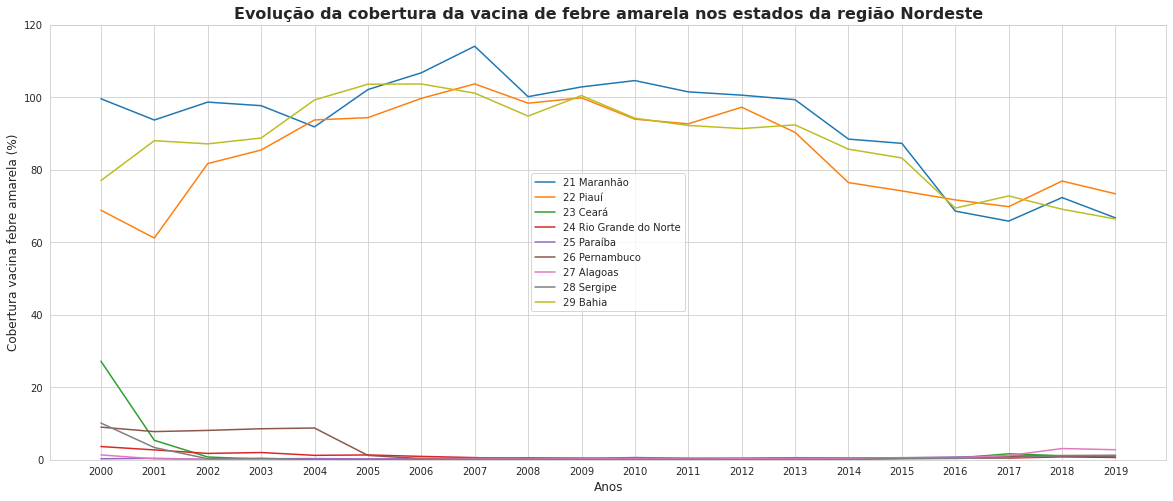

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=febre_melt.query('Regiao=="Nordeste"'), x='anos', y='cobertura', hue='Estados', palette='tab10', legend='full')
plt.xticks(np.arange(2000,2020,1)) 
plt.title('Evolução da cobertura da vacina de febre amarela nos estados da região Nordeste', fontsize=16, fontweight="bold")
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Cobertura vacina febre amarela (%)', fontsize=12)
plt.legend(loc='center')
plt.ylim(0,120)
plt.grid(True)
plt.show()

Alguns estados da região Nordeste não tem cobertura de vacina da febre amarela porque são áreas sem recomendação de vacinação (Ceará, Rio Grande do Norte, Paraíba, Pernambuco, parte do estado do Piauí, Alagoas (exceto município de Delmiro Gouveia) e Sergipe (exceto município de Canindé de São Francisco). 

Fonte: https://sbim.org.br/images/files/ms-sei-implantacao-da-vfa-dose-de-reforco.pdf

### Região Centro-Oeste

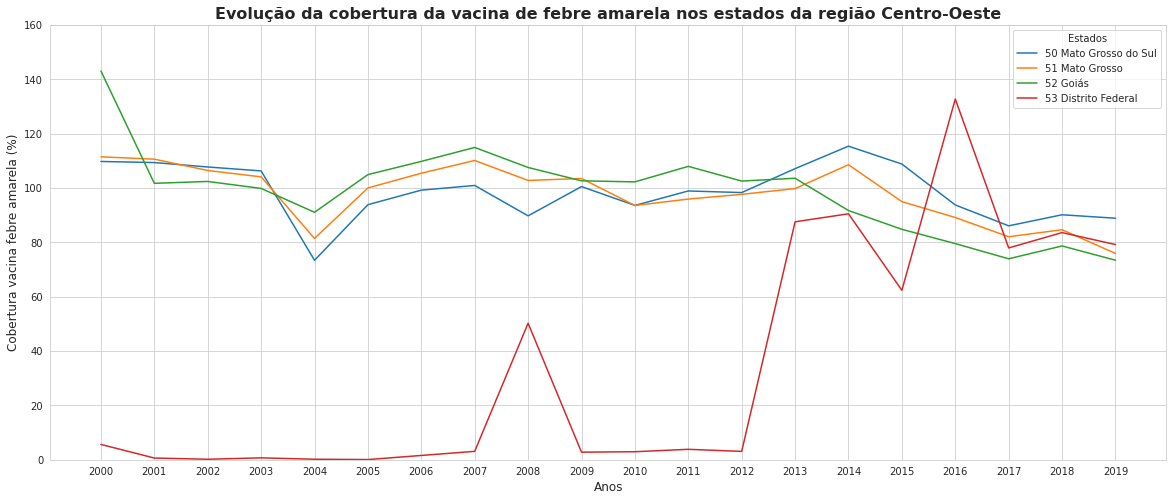

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=febre_melt.query('Regiao=="Centro-Oeste"'), x='anos', y='cobertura', hue='Estados', palette='tab10')
plt.xticks(np.arange(2000,2020,1)) 
plt.title('Evolução da cobertura da vacina de febre amarela nos estados da região Centro-Oeste', fontsize=16, fontweight="bold")
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Cobertura vacina febre amarela (%)', fontsize=12)
plt.ylim(0,160)
plt.grid(True)
plt.show()

Pico de cobertura no Distrito Federal no ano de 2016 como reflexo do surto de febre amarela ocorrido neste ano. Queda na cobertura dos demais estados da região nos últimos anos.

### Região Sul

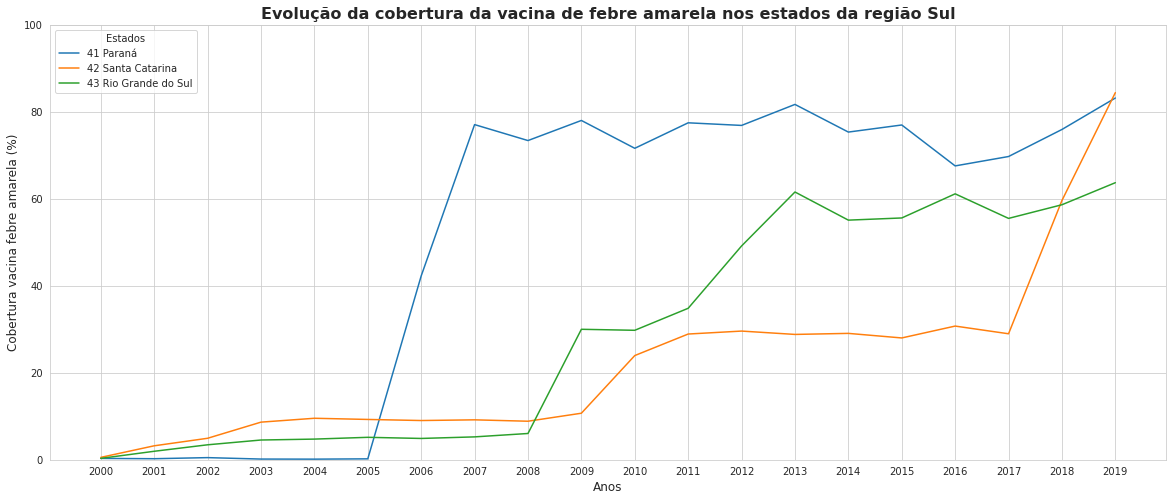

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=febre_melt.query('Regiao=="Sul"'), x='anos', y='cobertura', hue='Estados', palette='tab10')
plt.xticks(np.arange(2000,2020,1)) 
plt.title('Evolução da cobertura da vacina de febre amarela nos estados da região Sul', fontsize=16, fontweight="bold")
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Cobertura vacina febre amarela (%)', fontsize=12)
plt.ylim(0,100)
plt.grid(True)
plt.show()

Intensificação de vacinação em SC após 2017 como reflexo do surto de febre amarela na região Sudeste em 2016.

### Região Sudeste

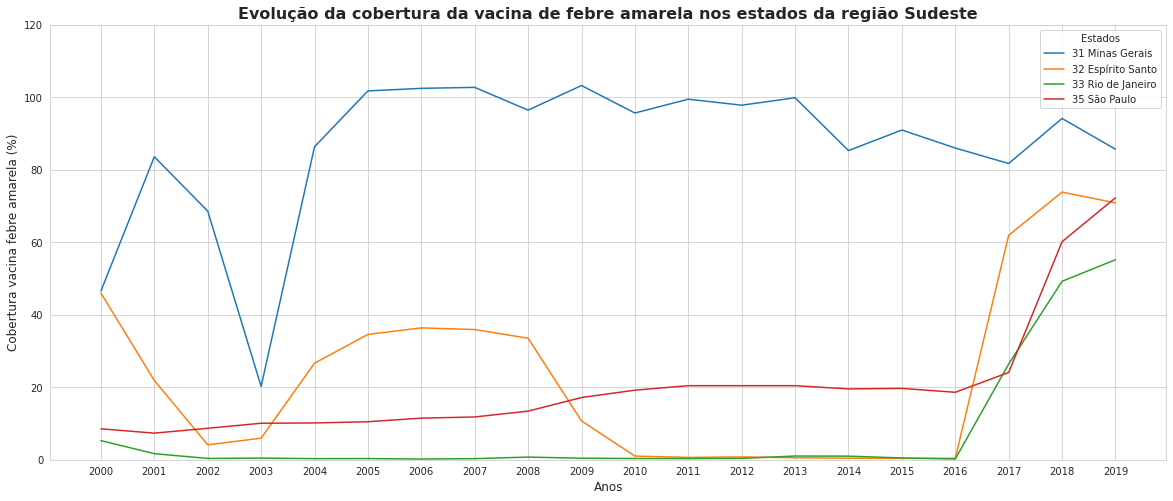

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=febre_melt.query('Regiao=="Sudeste"'), x='anos', y='cobertura', hue='Estados', palette='tab10')
plt.xticks(np.arange(2000,2020,1)) 
plt.title('Evolução da cobertura da vacina de febre amarela nos estados da região Sudeste', fontsize=16, fontweight="bold")
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Cobertura vacina febre amarela (%)', fontsize=12)
plt.ylim(0,120)
plt.grid(True)
plt.show()

Vacina da febre amarela só foi implantada nos estados de SP, RJ e ES após 2016 devido ao surto de febre amarela silvestre observado neste ano.

#5) Poliomielite

In [ ]:
#carregando a base de dados
polio = pd.read_csv("https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Poliomielite_estados_2019.csv",
                    encoding="ISO-8859-1", sep=";", decimal=",")
polio.head()

,Unidade da Federação,Poliomielite,Poliomielite 4 anos,Poliomielite(1º ref)
0,11 Rondônia,98.26,63.78,75.47
1,12 Acre,81.73,50.98,70.66
2,13 Amazonas,83.29,75.83,77.02
3,14 Roraima,79.76,67.68,69.29
4,15 Pará,72.72,39.49,60.00


In [ ]:
polio_melt = polio.melt(id_vars=['Unidade da Federação'], value_vars=polio.columns[1:])
polio_melt.columns = ['uf','vacinas','cobertura']
polio_melt

,uf,vacinas,cobertura
0,11 Rondônia,Poliomielite,98.26
1,12 Acre,Poliomielite,81.73
2,13 Amazonas,Poliomielite,83.29
3,14 Roraima,Poliomielite,79.76
4,15 Pará,Poliomielite,72.72
...,...,...,...
79,50 Mato Grosso do Sul,Poliomielite(1º ref),92.92
80,51 Mato Grosso,Poliomielite(1º ref),74.42
81,52 Goiás,Poliomielite(1º ref),73.61
82,53 Distrito Federal,Poliomielite(1º ref),77.23


## Gráfico: Cobertura da vacina de Poliomielite por estado no ano de 2019

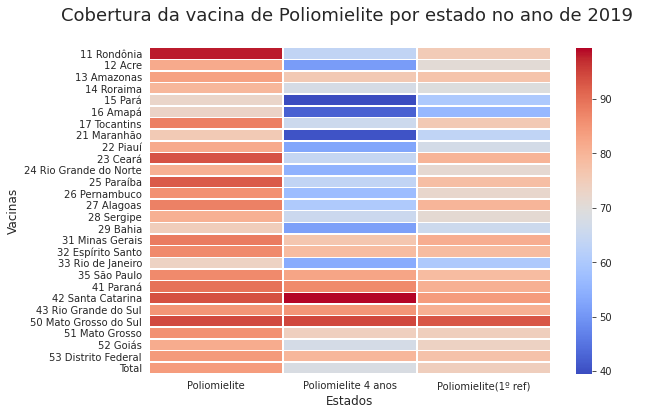

In [ ]:
gr_polio_melt = polio_melt.pivot("uf","vacinas","cobertura")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(gr_polio_melt, linewidths=.5, ax=ax, cmap='coolwarm')
ax.set_xlabel('Estados', fontsize=12)
ax.set_ylabel('Vacinas', fontsize=12)
plt.title('Cobertura da vacina de Poliomielite por estado no ano de 2019 \n', fontsize=18)
plt.show()

A vacina intitulada "Poliomielite" é a administrada até o primeiro ano de vida do bebê. Sua cobertura foi de acima de 80% na maioria dos estados no ano de 2019.
A vacina "Poliomielite(1o ref) é uma dose de reforço administrada anualmente em crianças de 1 a 4 anos. Esta vacina apresentou cobertura muito menor do que a primeira, com vários estados abaixo de 70%.
A vacina "Poliomielite 4 anos" é aplicada em crianças acima desta idade. Apresentou a menor cobertura na maioria dos estados, em comparação com as 2 outras, indicando que os pais estão deixando de levar os filhos para vacinação ao longo dos anos. 
O estados mais crítico é o RJ, com cobertura abaixo da média dos demais estados nos 3 tipos.

A base de dados do Datasus tem informações dos casos de Poliomielite com o nome de Paralisia Flácida Aguda, que serão analisados a seguir.

In [ ]:
#carregando base de dados de casos de polio
casos_polio = pd.read_csv("https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Casos_polio.csv",
                    encoding="ISO-8859-1", sep=";", decimal=",", skiprows=3)
casos_polio

,UF de notificação,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,11 Rondônia,35,18,20,9,17,18,17,11,5,6,2,11,4
1,12 Acre,7,11,5,5,13,6,6,6,3,3,4,-,3
2,13 Amazonas,13,15,16,11,17,13,17,11,20,20,29,21,24
3,14 Roraima,5,4,2,3,1,-,-,-,-,1,1,1,-
4,15 Pará,25,21,11,10,14,12,16,13,11,15,16,15,13
5,16 Amapá,3,7,7,3,7,5,2,2,3,5,2,2,-
6,17 Tocantins,3,9,7,2,4,-,-,3,9,2,6,6,4
7,21 Maranhão,32,17,14,17,20,23,23,18,22,19,23,33,22
8,22 Piauí,34,18,27,12,14,13,11,17,11,14,15,9,12
9,23 Ceará,33,28,24,20,30,18,11,8,4,2,13,20,3


In [ ]:
casos_polio = casos_polio.set_index('UF de notificação')
casos_polio.index = casos_polio.index.str[3:]
casos_polio

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
UF de notificação,,,,,,,,,,,,,
Rondônia,35,18,20,9,17,18,17,11,5,6,2,11,4
Acre,7,11,5,5,13,6,6,6,3,3,4,-,3
Amazonas,13,15,16,11,17,13,17,11,20,20,29,21,24
Roraima,5,4,2,3,1,-,-,-,-,1,1,1,-
Pará,25,21,11,10,14,12,16,13,11,15,16,15,13
Amapá,3,7,7,3,7,5,2,2,3,5,2,2,-
Tocantins,3,9,7,2,4,-,-,3,9,2,6,6,4
Maranhão,32,17,14,17,20,23,23,18,22,19,23,33,22
Piauí,34,18,27,12,14,13,11,17,11,14,15,9,12


In [ ]:
casos_polio = casos_polio.replace("-", 0).astype("float")
casos_polio.index = casos_polio.index.rename('uf')
casos_polio

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,,,,
Rondônia,35.0,18.0,20.0,9.0,17.0,18.0,17.0,11.0,5.0,6.0,2.0,11.0,4.0
Acre,7.0,11.0,5.0,5.0,13.0,6.0,6.0,6.0,3.0,3.0,4.0,0.0,3.0
Amazonas,13.0,15.0,16.0,11.0,17.0,13.0,17.0,11.0,20.0,20.0,29.0,21.0,24.0
Roraima,5.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
Pará,25.0,21.0,11.0,10.0,14.0,12.0,16.0,13.0,11.0,15.0,16.0,15.0,13.0
Amapá,3.0,7.0,7.0,3.0,7.0,5.0,2.0,2.0,3.0,5.0,2.0,2.0,0.0
Tocantins,3.0,9.0,7.0,2.0,4.0,0.0,0.0,3.0,9.0,2.0,6.0,6.0,4.0
Maranhão,32.0,17.0,14.0,17.0,20.0,23.0,23.0,18.0,22.0,19.0,23.0,33.0,22.0
Piauí,34.0,18.0,27.0,12.0,14.0,13.0,11.0,17.0,11.0,14.0,15.0,9.0,12.0


In [ ]:
casos_polio_melt = casos_polio.reset_index().melt(id_vars=['uf'], value_vars=casos_polio.columns[1:])
casos_polio_melt.columns = ['uf','anos','casos']
casos_polio_melt.head()

,uf,anos,casos
0,Rondônia,2008,18.0
1,Acre,2008,11.0
2,Amazonas,2008,15.0
3,Roraima,2008,4.0
4,Pará,2008,21.0


## Gráfico: Evolução do número de casos de Polio por estado

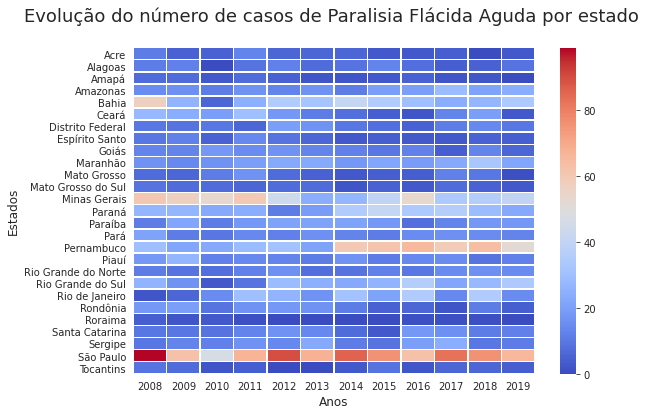

In [ ]:
gr_casos_polio_melt = casos_polio_melt.pivot("uf","anos","casos")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(gr_casos_polio_melt, linewidths=.5, ax=ax, cmap='coolwarm')
ax.set_xlabel('Anos', fontsize=12)
ax.set_ylabel('Estados', fontsize=12)
plt.title('Evolução do número de casos de Paralisia Flácida Aguda por estado \n', fontsize=18)
plt.show()

Analisando o número absoluto de casos de polio ao longo dos anos:
- Aumento no número de casos no estado de Pernambuco a partir de 2014.
- São Paulo é o estado com maior número de casos, porém é o que tem maior população.
Na sequência farei uma análise da proporção do número de casos em relação à população de cada estado. 

In [ ]:
#base de informações de população por estado no ano de 2019
pop_2019 = pd.read_csv("https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/pop_2019.csv", 
                       encoding='ISO-8859-1', sep=";")
pop_2019

,Unidade da Federação,2019
0,11 Rondônia,1841142
1,12 Acre,854691
2,13 Amazonas,4182899
3,14 Roraima,538963
4,15 Pará,8544639
5,16 Amapá,828028
6,17 Tocantins,1583391
7,21 Maranhão,7083578
8,22 Piauí,3229651
9,23 Ceará,9128090


In [ ]:
pop_2019 = pop_2019.set_index('Unidade da Federação')
pop_2019.index = pop_2019.index.str[3:]
pop_2019.index = pop_2019.index.rename('uf')
pop_2019

,2019
uf,
Rondônia,1841142
Acre,854691
Amazonas,4182899
Roraima,538963
Pará,8544639
Amapá,828028
Tocantins,1583391
Maranhão,7083578
Piauí,3229651


In [ ]:
casos_polio_pop_2019 = pop_2019
casos_polio_pop_2019['casos'] = casos_polio['2019']
casos_polio_pop_2019

,2019,casos
uf,,
Rondônia,1841142,4.0
Acre,854691,3.0
Amazonas,4182899,24.0
Roraima,538963,0.0
Pará,8544639,13.0
Amapá,828028,0.0
Tocantins,1583391,4.0
Maranhão,7083578,22.0
Piauí,3229651,12.0


In [ ]:
#inserindo coluna com número de casos de polio por estado a cada 100 mil habitantes
casos_polio_pop_2019['casos_100k'] = casos_polio_pop_2019['casos'] / casos_polio_pop_2019['2019']*100000
casos_polio_pop_2019

,2019,casos,casos_100k
uf,,,
Rondônia,1841142,4.0,0.217256
Acre,854691,3.0,0.351004
Amazonas,4182899,24.0,0.573765
Roraima,538963,0.0,0.000000
Pará,8544639,13.0,0.152142
Amapá,828028,0.0,0.000000
Tocantins,1583391,4.0,0.252622
Maranhão,7083578,22.0,0.310578
Piauí,3229651,12.0,0.371557


In [ ]:
#ordenando
casos_polio_pop_2019 = casos_polio_pop_2019.sort_values(by=['casos_100k'], ascending=False)
casos_polio_pop_2019

,2019,casos,casos_100k
uf,,,
Amazonas,4182899,24.0,0.573765
Pernambuco,9593588,52.0,0.542029
Sergipe,2331323,11.0,0.471835
Paraíba,4074755,18.0,0.441744
Rio Grande do Norte,3568644,15.0,0.420328
Piauí,3229651,12.0,0.371557
Acre,854691,3.0,0.351004
Distrito Federal,3162452,10.0,0.316210
Maranhão,7083578,22.0,0.310578


## Gráfico: Número de casos de Polio a cada 100 mil habitantes no ano de 2019

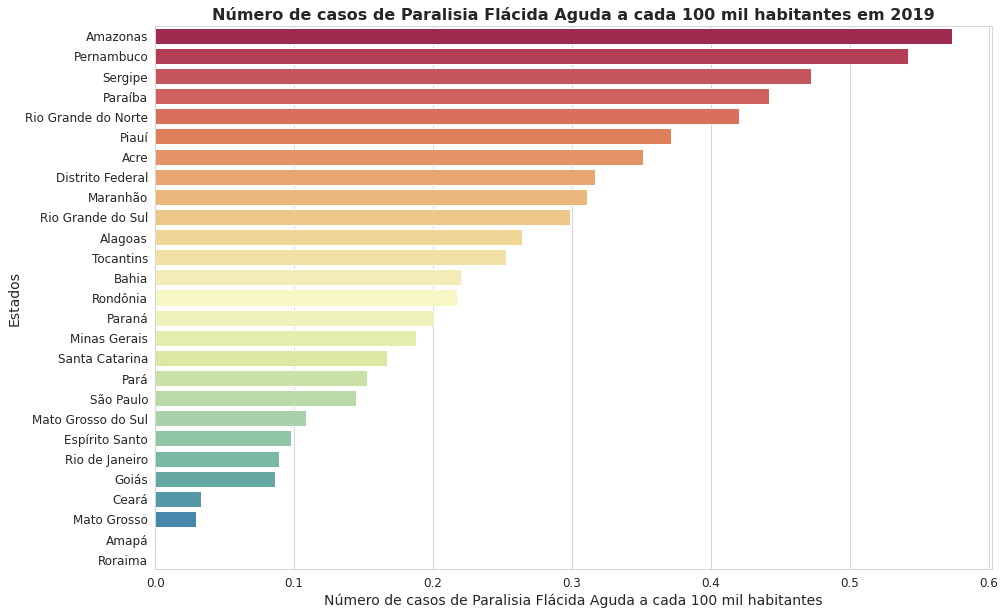

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(data=casos_polio_pop_2019, x='casos_100k', y=casos_polio_pop_2019.index, palette='Spectral')
plt.title('Número de casos de Paralisia Flácida Aguda a cada 100 mil habitantes em 2019', fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Número de casos de Paralisia Flácida Aguda a cada 100 mil habitantes', fontsize=14)
plt.ylabel('Estados', fontsize=14)
plt.show()

Neste gráfico do número de casos de Paralisia Flácida Aguda proporcional a cada 100 mil habitantes:
- O estado de São Paulo, que tinha o maior número absoluto de casos no gráfico anterior, esta em 19o lugar quando analisamos o número de casos proporcional ao tamanho da população.
- Dos 10 estados com maior número de casos, 8 estão nas regiões Norte e Nordeste. 
- O estado com maior número de casos a cada 100 mil habitantes é o Amazonas, provavelmente devido à dificuldade da vacinação ter uma cobertura ampla em um estado com regiões de difícil acesso (população rural e ribeirinha).
- Pernambuco é o segundo estado com maior número de casos, provavelmente devido à dificuldade de acesso de populações que vivem no interior do estado (sertão).


#6) Sarampo

In [ ]:
#As vacinas que protegem contra sarampo, caxumba e rubéola são: Tríplice Viral D1, Tríplice Viral D2 e Tetraviral (SRC+VZ), sendo que est última protege também contra Varicela
#Carregando a base de dados destas vacinas para o ano de 2019
viral = pd.read_csv("https://raw.githubusercontent.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/main/Viral.csv",
                    encoding="ISO-8859-1", sep=";", decimal=",")
viral.head()

,Unidade da Federação,Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ)
0,11 Rondônia,106.42,82.25,70.74
1,12 Acre,87.39,78.65,75.68
2,13 Amazonas,92.12,82.29,72.71
3,14 Roraima,81.21,86.72,74.53
4,15 Pará,82.81,71.34,59.90


In [ ]:
viral_melt = viral.melt(id_vars=['Unidade da Federação'], value_vars=viral.columns[1:])
viral_melt.columns = ['uf','vacinas','cobertura']
viral_melt

,uf,vacinas,cobertura
0,11 Rondônia,Tríplice Viral D1,106.42
1,12 Acre,Tríplice Viral D1,87.39
2,13 Amazonas,Tríplice Viral D1,92.12
3,14 Roraima,Tríplice Viral D1,81.21
4,15 Pará,Tríplice Viral D1,82.81
...,...,...,...
79,50 Mato Grosso do Sul,Tetra Viral(SRC+VZ),81.86
80,51 Mato Grosso,Tetra Viral(SRC+VZ),79.44
81,52 Goiás,Tetra Viral(SRC+VZ),71.18
82,53 Distrito Federal,Tetra Viral(SRC+VZ),84.27


## Gráfico: Cobertura das vacinas Tríplice e Tetra Viral por estado no ano de 2019

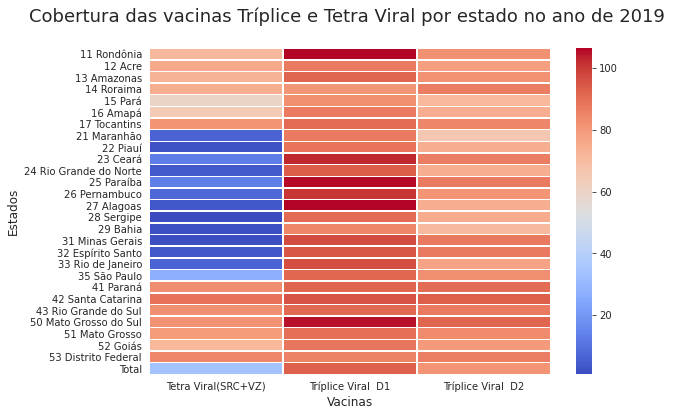

In [ ]:
gr_viral_melt = viral_melt.pivot("uf","vacinas","cobertura")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(gr_viral_melt, linewidths=.5, ax=ax, cmap='coolwarm')
ax.set_xlabel('Vacinas', fontsize=12)
ax.set_ylabel('Estados', fontsize=12)
plt.title('Cobertura das vacinas Tríplice e Tetra Viral por estado no ano de 2019 \n', fontsize=18)
plt.show()

- Tríplice Viral D1 (< 1 ano): cobertura acima de 90% em todos os estados.
- Tríplice Viral D2 (> 1 ano): cobertura inferior a 80% em 19 estados.
- Tetra Viral (15 meses a 2 anos): cobertura inferior a 60% em 16 estados.

In [ ]:
# Número de casos de sarampo não está disponível no TABNET
# Porém há um boletim epidemiológico que tem o número de casos confirmados no ano de 2019:
# fonte : https://antigo.saude.gov.br/images/pdf/2020/April/08/Boletim-epidemiologico-SVS-06-v2.pdf
sarampo_19_dict = {'São Paulo':16090,
                   'Paraná':760,
                   'Rio de Janeiro':333,
                   'Pernambuco':268,
                   'Santa Catarina':251,
                   'Minas Gerais':135,
                   'Pará':118,
                   'Rio Grande do Sul':64,
                   'Paraíba':52,
                   'Bahia':48,
                   'Alagoas':32,
                   'Ceará':9,
                   'Maranhão':7,
                   'Sergipe':6,
                   'Rio Grande do Sul':6,
                   'Distrito Federal':5,
                   'Goiás':5,
                   'Amazonas':4,
                   'Piauí':3,
                   'Espírito Santo':2,
                   'Mato Grosso do Sul':2,
                   'Amapá':2,
                   'Roraima':1
                   }

In [ ]:
#Cruzando a população com o número de casos de sarampo por estado no ano de 2019
sarampo_pop_2019 = pop_2019
sarampo_pop_2019['casos'] = sarampo_pop_2019.index.map(sarampo_19_dict)
sarampo_pop_2019

,2019,casos,casos_100k
uf,,,
Rondônia,1841142,NaN,0.217256
Acre,854691,NaN,0.351004
Amazonas,4182899,4.0,0.573765
Roraima,538963,1.0,0.000000
Pará,8544639,118.0,0.152142
Amapá,828028,2.0,0.000000
Tocantins,1583391,NaN,0.252622
Maranhão,7083578,7.0,0.310578
Piauí,3229651,3.0,0.371557


In [ ]:
#Substituindo NaN por zero
sarampo_pop_2019 = sarampo_pop_2019.replace(np.nan,0)
sarampo_pop_2019

,2019,casos,casos_100k
uf,,,
Rondônia,1841142,0.0,0.217256
Acre,854691,0.0,0.351004
Amazonas,4182899,4.0,0.573765
Roraima,538963,1.0,0.000000
Pará,8544639,118.0,0.152142
Amapá,828028,2.0,0.000000
Tocantins,1583391,0.0,0.252622
Maranhão,7083578,7.0,0.310578
Piauí,3229651,3.0,0.371557


In [ ]:
#número de casos de sarampo por estado a cada 100 mil habitantes
sarampo_pop_2019['casos_100k'] = (sarampo_pop_2019['casos'] / sarampo_pop_2019['2019']*100000)
sarampo_pop_2019

,2019,casos,casos_100k
uf,,,
Rondônia,1841142,0.0,0.000000
Acre,854691,0.0,0.000000
Amazonas,4182899,4.0,0.095627
Roraima,538963,1.0,0.185541
Pará,8544639,118.0,1.380983
Amapá,828028,2.0,0.241538
Tocantins,1583391,0.0,0.000000
Maranhão,7083578,7.0,0.098820
Piauí,3229651,3.0,0.092889


In [ ]:
sarampo_pop_2019 = sarampo_pop_2019.sort_values(by=['casos_100k'], ascending=False)
sarampo_pop_2019

,2019,casos,casos_100k
uf,,,
São Paulo,45752757,16090.0,35.167280
Paraná,11468818,760.0,6.626664
Santa Catarina,7179056,251.0,3.496281
Pernambuco,9593588,268.0,2.793533
Rio de Janeiro,16874306,333.0,1.973414
Pará,8544639,118.0,1.380983
Paraíba,4074755,52.0,1.276150
Alagoas,3405893,32.0,0.939548
Minas Gerais,21346492,135.0,0.632422


## Gráfico: Número de casos de sarampo a cada 100 mil habitantes em 2019

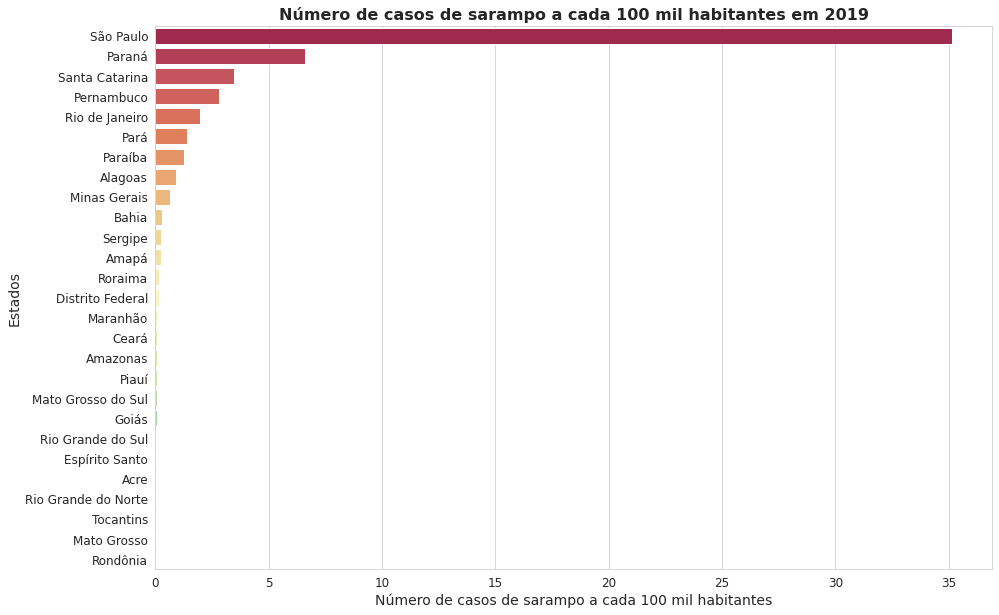

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(data=sarampo_pop_2019, x='casos_100k', y=sarampo_pop_2019.index, palette='Spectral')
plt.title('Número de casos de sarampo a cada 100 mil habitantes em 2019', fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Número de casos de sarampo a cada 100 mil habitantes', fontsize=14)
plt.ylabel('Estados', fontsize=14)
plt.show()

Alto número de casos de sarampo por 100 mil habitantes concentrados principalmente no estado de São Paulo. Talvez possa estar relacionado à cobertura vacinal do estado abaixo da meta de 95%:
Tríplice viral D1 92%, Tríplice Viral D2 82% e Tetra Viral (SRC+VZ) apenas 27%.